In [2]:
import pandas as pd
import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alche\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Topic Modeling

In [3]:
df = pd.read_parquet("../datasets/cleaned_datasets/demographic_infused_philly_c.parquet")
df['date'] = pd.to_datetime(df['date'])

print(df.head())
print(df.columns)

unique_zip_codes = df['area_code'].unique()
unique_zip_codes


                review_id                 user_id             business_id  \
0  J1LZjzbs5bFubvS135SD2g  5TE19zTjTIPq1HANACN7sw  dChRGpit9fM_kZK5pafNyA   
1  ecMiAOFucDM3zwXYfY-Q6A  5Z8S9OsHWCnE8wbxk1poQQ  s3Q1J4XEVOBiZy9dYUpqpg   
2  yuFQRhHo3z4TgE6drPXSgg  hcw7ndQKWGEH4P7BYAlG9w  JUlsvVAvZvGHWFfkKm0nlg   
3  Zdh0_HtE724MnohLOrB5Iw  OYaEBYLBrLY4mla8bOMbnA  9b0Mrvs6uJu2jJqet_Jwew   
4  y_XYEZk2Cin-q4N0czeaYw  _9VhEn9zaB-6txE3STNfLw  PYUI1OJVksGUbCrteU68bw   

   stars_rev                                               text  \
0          5  Had a great big meal with family and we loved ...   
1          5  Many locations.  All have lines so be prepared...   
2          5  Compliments to the chef and to the rest of the...   
3          4  I decided to try this spot out -- and it didn'...   
4          3  First off, finding parking is atrocious. Your ...   

                 date               name              address          city  \
0 2020-01-20 00:36:44           The Love        130 S 1

array(['19103', '19125', '19123', '19146', '19106', '19107', '19147',
       '19104', '19102', '19148', '19145', '19130', '19151', '19131',
       '19153', '19114', '19154', '19135', '19118', '19119', '19120',
       '19122', '19129', '19128', '19132', '19143', '19116', '19152',
       '19127', None, '19115', '19124', '19139', '19111', '19134',
       '19126', '19150', '19136', '19144', '19140', '19141', '19149',
       '19142', '19133', '19137', '19121', '19138', '19108', '19112',
       '19113', '19109'], dtype=object)

## Topic Coherence and Perplexity
Coherence score measures the degree to which the top words in a topic are related or tend to occur together in the corpus. A high coherence score indicates that the words in a topic are likely to be more semantically related, making the topic easier to interpret

In [4]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

In [5]:
coherence_scores = {}
topics_by_zip = {}

for zip_code in unique_zip_codes:
    df_zip = df[df['area_code'] == zip_code]
    docs = df_zip['clean_text'].tolist()
    
    if not docs:
        continue

    texts = [doc.split() for doc in docs]
    id2word = corpora.Dictionary(texts)
    corpus = [id2word.doc2bow(text) for text in texts]

    gensim_lda = gensim.models.LdaModel(
        corpus=corpus, id2word=id2word, num_topics=10,
        random_state=42, passes=10
    )

    topics = gensim_lda.print_topics(num_words=10)
    topics_list = [topic for topic in topics]
    topics_by_zip[zip_code] = topics_list

    coherence_model = CoherenceModel(
        model=gensim_lda, texts=texts, dictionary=id2word, coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()
    coherence_scores[zip_code] = coherence_score
    print(f"Area Code: {zip_code}")
    print("Topics:", topics_list)
    print(f"Coherence Score: {coherence_score}\n")

Area Code: 19103 - Coherence Score: 0.4733983980864355
Area Code: 19125 - Coherence Score: 0.37666877693106315
Area Code: 19123 - Coherence Score: 0.4228055061001884
Area Code: 19146 - Coherence Score: 0.38077312514415196
Area Code: 19106 - Coherence Score: 0.4403958377300704
Area Code: 19107 - Coherence Score: 0.43571504930744825
Area Code: 19147 - Coherence Score: 0.46943994590066246
Area Code: 19104 - Coherence Score: 0.4270375518692887
Area Code: 19102 - Coherence Score: 0.4340652106094304
Area Code: 19148 - Coherence Score: 0.3868022210661143
Area Code: 19145 - Coherence Score: 0.3666333810068335
Area Code: 19130 - Coherence Score: 0.36838739297863615
Area Code: 19151 - Coherence Score: 0.34246312074049867
Area Code: 19131 - Coherence Score: 0.2834452571774469
Area Code: 19153 - Coherence Score: 0.3643515094234127
Area Code: 19114 - Coherence Score: 0.3038302946411059
Area Code: 19154 - Coherence Score: 0.3021581337842877
Area Code: 19135 - Coherence Score: 0.3123651488669026
Area

Topic Visualization

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model

In [ ]:
pyLDAvis.enable_notebook()

for zip_code in unique_zip_codes:
    df_zip = df[df['area_code'] == zip_code]
    docs = df_zip['clean_text'].tolist()
    
    if not docs:
        continue

    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(docs)

    lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
    lda_topics = lda_model.fit_transform(doc_term_matrix)

    print(f"\nDisplaying pyLDAvis for Area Code: {zip_code}")
    panel = pyLDAvis.lda_model.prepare(lda_model, doc_term_matrix, vectorizer, mds='tsne')
    pyLDAvis.display(panel)


Displaying pyLDAvis for Area Code: 19103

Displaying pyLDAvis for Area Code: 19125

Displaying pyLDAvis for Area Code: 19123


KeyboardInterrupt: 

BERTopic

In [9]:
from bertopic import BERTopic

In [10]:
for zip_code in unique_zip_codes:
    df_zip = df[df['area_code'] == zip_code]
    docs = df_zip['clean_text'].tolist()
    
    if not docs:
        continue

    print(f"\nBERTopic Analysis for Area Code: {zip_code}")
    try:
        topic_model = BERTopic()
        topics, probabilities = topic_model.fit_transform(docs)
        print(topic_model.get_topic_info())
        topic_model.visualize_topics()
    except Exception as e:
        print(f"BERTopic failed for Area code {zip_code} with error: {e}")


BERTopic Analysis for Area Code: 19103
     Topic  Count                                    Name  \
0       -1   4949                -1_food_good_great_place   
1        0    321            0_italian_gelato_pasta_italy   
2        1    299          1_taco_burrito_margarita_nacho   
3        2    295               2_table_rude_asked_minute   
4        3    237                3_hair_salon_cut_haircut   
..     ...    ...                                     ...   
107    106     11             106_kati_masala_roll_paneer   
108    107     11            107_gym_membership_email_psc   
109    108     10  108_comedy_cocktail_distant_watermelon   
110    109     10      109_courier_rapid_service_seamless   
111    110     10               110_dig_nom_takeout_lunch   

                                        Representation  \
0    [food, good, great, place, service, restaurant...   
1    [italian, gelato, pasta, italy, gran, restaura...   
2    [taco, burrito, margarita, nacho, salsa, mexic..

KeyboardInterrupt: 

Non-Negative Matrix Factorization (NMF)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [12]:
for zip_code in unique_zip_codes:
    df_zip = df[df['area_code'] == zip_code]
    docs = df_zip['clean_text'].tolist()
    
    if not docs:
        continue

    print(f"\nNMF Analysis for Area Code: {zip_code}")
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(docs)

    nmf_model = NMF(n_components=10, random_state=42)
    nmf_topics = nmf_model.fit_transform(tfidf)

    def display_nmf_topics(model, feature_names, no_top_words):
        for topic_idx, topic in enumerate(model.components_):
            print(f"Topic {topic_idx}:")
            print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    
    print("NMF Topics:")
    display_nmf_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10)



NMF Analysis for Area Code: 19103
NMF Topics:
Topic 0:
restaurant dish table menu meal came dinner pasta server drink
Topic 1:
time order ive im dont customer like hair minute nail
Topic 2:
great service food amazing friendly place staff recommend highly atmosphere
Topic 3:
bagel coffee cheese order jerusalem cream breakfast latte egg pastry
Topic 4:
pizza crust pie slice best vegan topping sauce cheese place
Topic 5:
good really food place nice drink pretty taco price like
Topic 6:
roll lobster sushi fresh tuna crab salmon spicy ordered special
Topic 7:
room hotel stay staff location clean night parking desk nice
Topic 8:
sandwich cheese cheesesteak fry philly steak meat bread best place
Topic 9:
chicken delicious fried sauce bowl rice bun order flavor ordered

NMF Analysis for Area Code: 19125
NMF Topics:
Topic 0:
food menu amazing drink restaurant delicious suraya dish table dinner
Topic 1:
pizza slice pie crust square pepperoni cheese best good sauce
Topic 2:
hair recommend highly

Temporal Analysis

In [13]:
import matplotlib.pyplot as plt

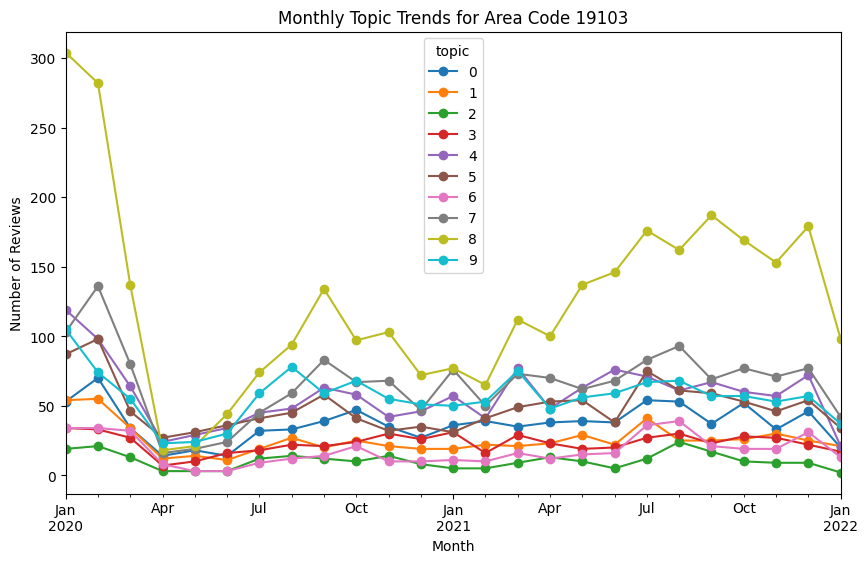

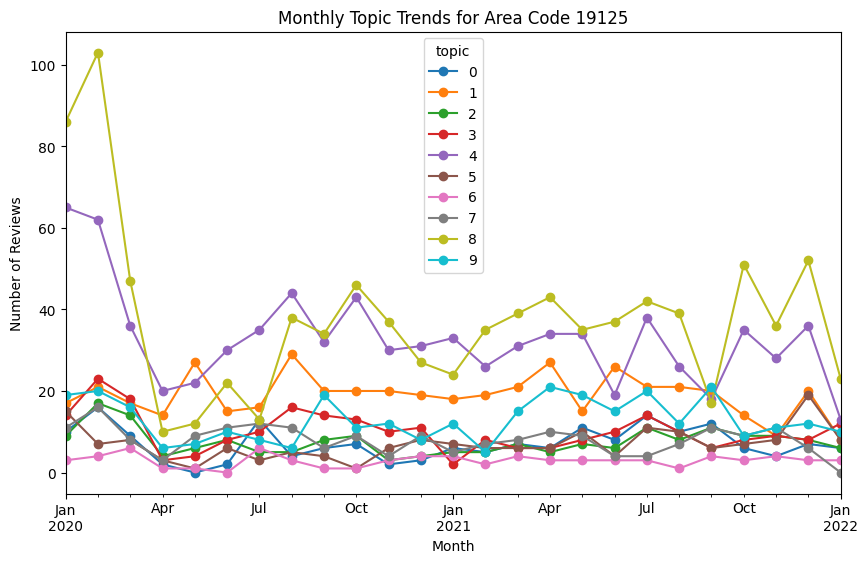

KeyboardInterrupt: 

In [14]:
for zip_code in unique_zip_codes:
    df_zip = df[df['area_code'] == zip_code].copy()
    if df_zip.empty:
        continue
    
    docs = df_zip['clean_text'].tolist()
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(docs)
    
    lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
    lda_topics = lda_model.fit_transform(doc_term_matrix)
    
    df_zip['topic'] = lda_topics.argmax(axis=1)
    
    topic_trends = df_zip.groupby([df_zip['date'].dt.to_period("M"), 'topic']).size().unstack(fill_value=0)
    topic_trends.plot(figsize=(10,6), marker='o')
    plt.title(f"Monthly Topic Trends for Area Code {zip_code}")
    plt.xlabel("Month")
    plt.ylabel("Number of Reviews")
    plt.show()


Demographic/Rating Analysis

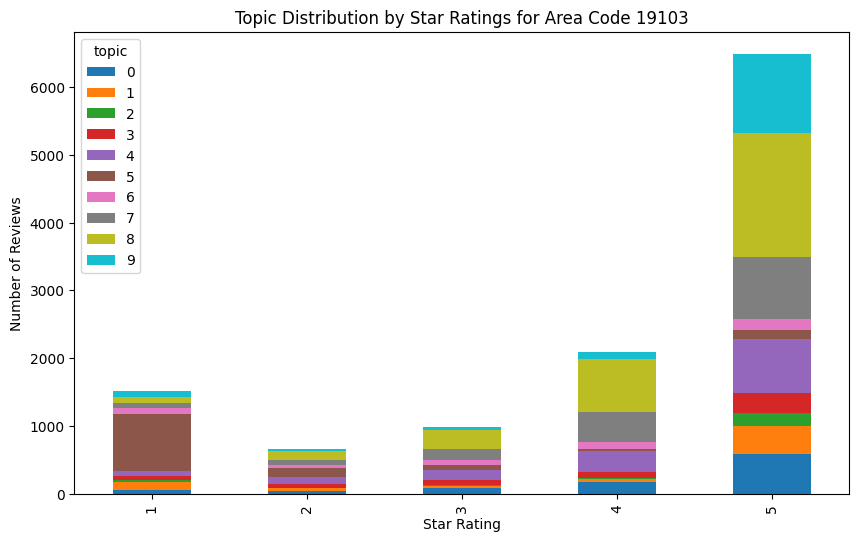

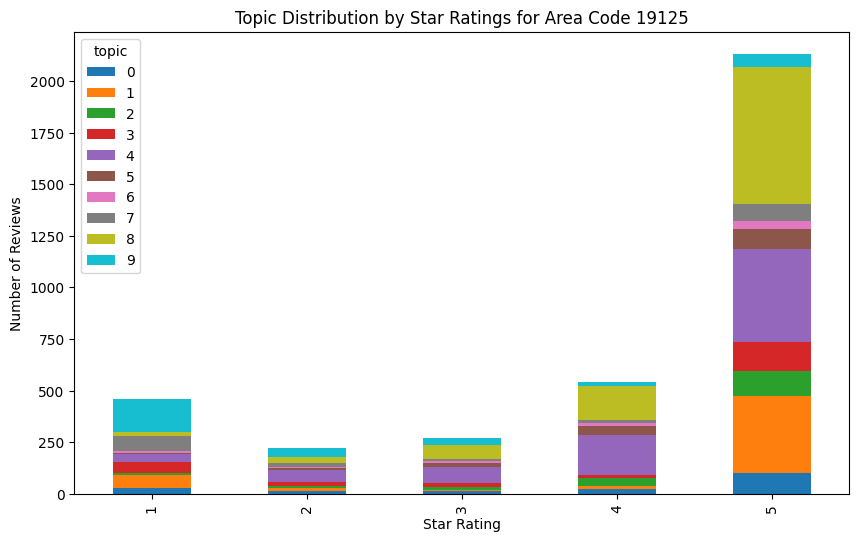

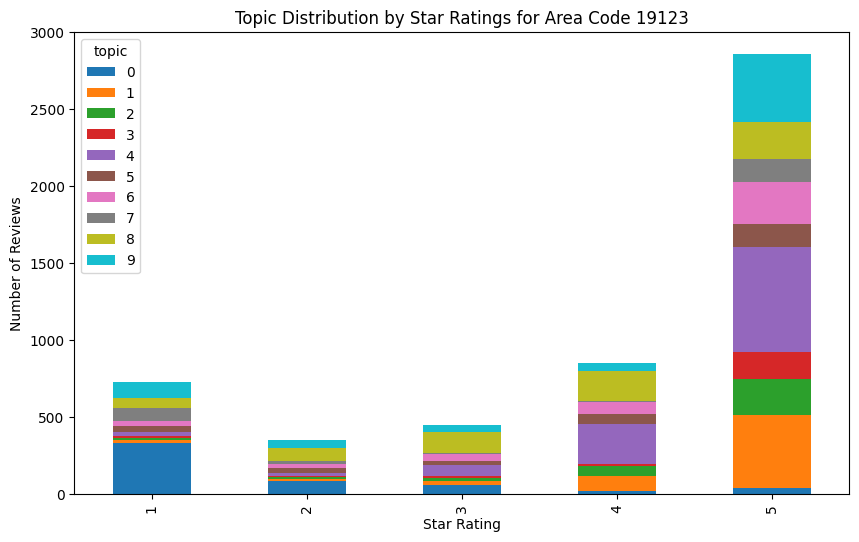

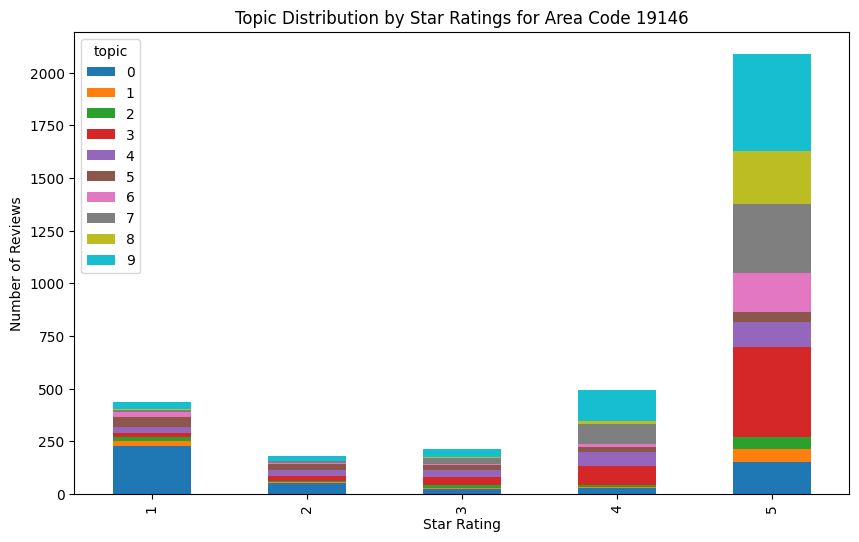

KeyboardInterrupt: 

In [15]:
for zip_code in unique_zip_codes:
    df_zip = df[df['area_code'] == zip_code].copy()
    if df_zip.empty:
        continue
    
    docs = df_zip['clean_text'].tolist()
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(docs)
    
    lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
    lda_topics = lda_model.fit_transform(doc_term_matrix)
    
    df_zip['topic'] = lda_topics.argmax(axis=1)
    
    topic_by_stars = df_zip.groupby(['stars_rev', 'topic']).size().unstack(fill_value=0)
    topic_by_stars.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title(f"Topic Distribution by Star Ratings for Area Code {zip_code}")
    plt.xlabel("Star Rating")
    plt.ylabel("Number of Reviews")
    plt.show()
